# Trabajo Práctico: "Prácticas Computacionales"

##Matemática Discreta - Segundo cuatrimestre Año 2024.

##Alumna: Ma. Soledad García Ortiz

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from numpy import pi

## Área de la elipse

In [88]:
txt1= '/content/drive/MyDrive/Matematica discreta/f1.txt'
matriz1 = np.loadtxt(txt1)

In [89]:
x = matriz1[0, :]
y = matriz1[1, :]



In [90]:
def calcular_centro(matrix):
    center = np.mean(matrix, axis=1)
    return center

def calcular_vectores_principales(matrix, center):
    distancias = np.linalg.norm(matrix - center[:, None], axis=0)
    max_idx = np.argmax(distancias)
    min_idx = np.argmin(distancias)
    max_vector = matrix[:, max_idx] - center
    min_vector = matrix[:, min_idx] - center
    return max_vector, min_vector

centro= calcular_centro(matriz1)
v1, v2= calcular_vectores_principales(matriz1, centro)

In [91]:

N_samples = 10000
xx = np.random.uniform(low=1.25, high=3.25, size=N_samples)
yy = np.random.uniform(low=2.25, high=4.25, size=N_samples)
xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios


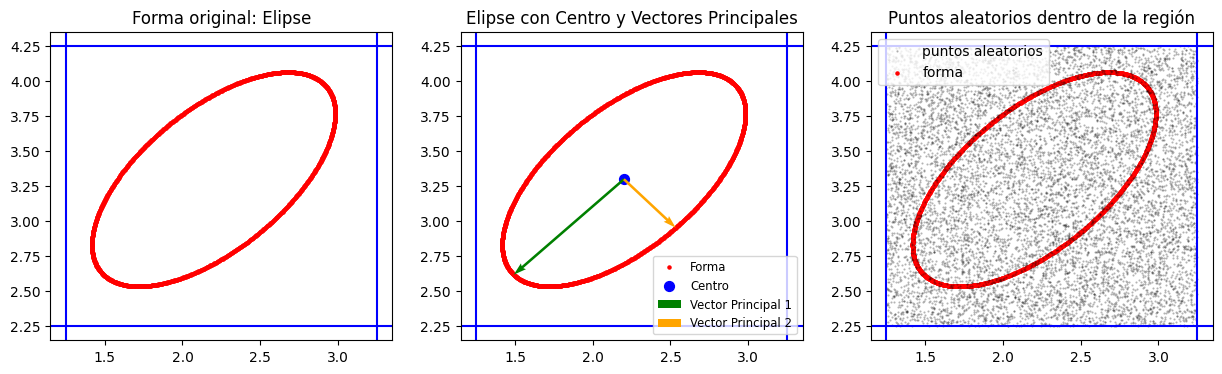

In [92]:

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(x, y, color='red', s=5)
axs[0].axhline(2.25, color='blue')
axs[0].axhline(4.25, color='blue')
axs[0].axvline(1.25, color='blue')
axs[0].axvline(3.25, color='blue')
axs[0].set_title("Forma original: Elipse")
#axs[0].legend()


axs[1].scatter(x, y, color='red', label='Forma', s=5)
axs[1].scatter(centro[0], centro[1], color='blue', label='Centro', s=50)  # Centro en azul
# Graficar vectores principales
axs[1].quiver(centro[0], centro[1], v1[0], v1[1], color='green', angles='xy', scale_units='xy', scale=1, label='Vector Principal 1')
axs[1].quiver(centro[0], centro[1], v2[0], v2[1], color='orange', angles='xy', scale_units='xy', scale=1, label='Vector Principal 2')
axs[1].axhline(2.25, color='blue')
axs[1].axhline(4.25, color='blue')
axs[1].axvline(1.25, color='blue')
axs[1].axvline(3.25, color='blue')
axs[1].set_title("Elipse con Centro y Vectores Principales")
axs[1].legend(fontsize='small')


axs[2].plot(xy[0, :], xy[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[2].scatter(x, y, color='red', label='forma', s=5)
axs[2].axhline(2.25, color='blue')
axs[2].axhline(4.25, color='blue')
axs[2].axvline(1.25, color='blue')
axs[2].axvline(3.25, color='blue')
axs[2].set_title("Puntos aleatorios dentro de la región")
axs[2].legend()

plt.show()


In [93]:
def traslacion_al_origen(data, centro, v1, v2):
    # Trasladamos los puntos para que el centro esté en (0,0)
    transladar_data = data - centro.reshape(2, 1)
    return transladar_data


def transform_circulo_unit(data, v1, v2):

    """
    Transforma los puntos de una elipse en `data` para convertirla en un círculo unitario.
    Usa los vectores principales `v1` y `v2` como la base.
    """
    # Matriz de transformación: base formada por los vectores v1 y v2
    T = np.vstack((v1, v2)).T

    # Aplicar la transformación inversa para escalar la elipse a un círculo unitario
    transformar_data = np.dot(np.linalg.inv(T), data)
    return transformar_data


elipse_en_origen= traslacion_al_origen(matriz1, centro, v1, v2)
nuevo_centro =calcular_centro(elipse_en_origen)
nuevo_v1, nuevo_v2= calcular_vectores_principales(elipse_en_origen, nuevo_centro)


circulo_unitario= transform_circulo_unit(elipse_en_origen, nuevo_v1, nuevo_v2)




In [94]:

# Coordenadas del cuadrado original
x_min, x_max = 1.25, 3.25
y_min, y_max = 2.25, 4.25

# Generar puntos a lo largo del perímetro
# Lado inferior (de x_min a x_max en y_min)
bottom_side_x = np.linspace(x_min, x_max, 50)
bottom_side_y = np.full_like(bottom_side_x, y_min)

# Lado superior (de x_min a x_max en y_max)
top_side_x = np.linspace(x_min, x_max, 50)
top_side_y = np.full_like(top_side_x, y_max)

# Lado izquierdo (de y_min a y_max en x_min)
left_side_y = np.linspace(y_min, y_max, 50)
left_side_x = np.full_like(left_side_y, x_min)

# Lado derecho (de y_min a y_max en x_max)
right_side_y = np.linspace(y_min, y_max, 50)
right_side_x = np.full_like(right_side_y, x_max)

# Combinar todos los lados en una sola matriz
x_perimetro = np.concatenate([bottom_side_x, top_side_x, left_side_x, right_side_x])
y_perimetro = np.concatenate([bottom_side_y, top_side_y, left_side_y, right_side_y])
perimetro_cuadrado = np.vstack([x_perimetro, y_perimetro])


# Trasladar al origen usando el centro
def traslacion_al_origen_2(matriz_puntos, centro):
    return matriz_puntos - centro[:, None]



In [95]:

centro_region = calcular_centro(perimetro_cuadrado)
perimetro_trasladado= traslacion_al_origen_2(perimetro_cuadrado, centro_region)
perim_unitario= transform_circulo_unit(perimetro_trasladado, nuevo_v1, nuevo_v2)

samples_centro= calcular_centro(xy)
samples_trasladados= traslacion_al_origen_2(xy, samples_centro)
samples_unitario= transform_circulo_unit(samples_trasladados, nuevo_v1, nuevo_v2)


In [96]:

# Calcular la distancia al origen en el sistema unitario
distancia_al_origen = np.linalg.norm(samples_unitario, axis=0)

# Filtrar puntos dentro del círculo unitario (distancia <= 1)
puntos_dentro_circulo = distancia_al_origen <= 1
xy_dentro_circulo = samples_unitario[:, puntos_dentro_circulo]  # Filtrar solo los puntos dentro del círculo


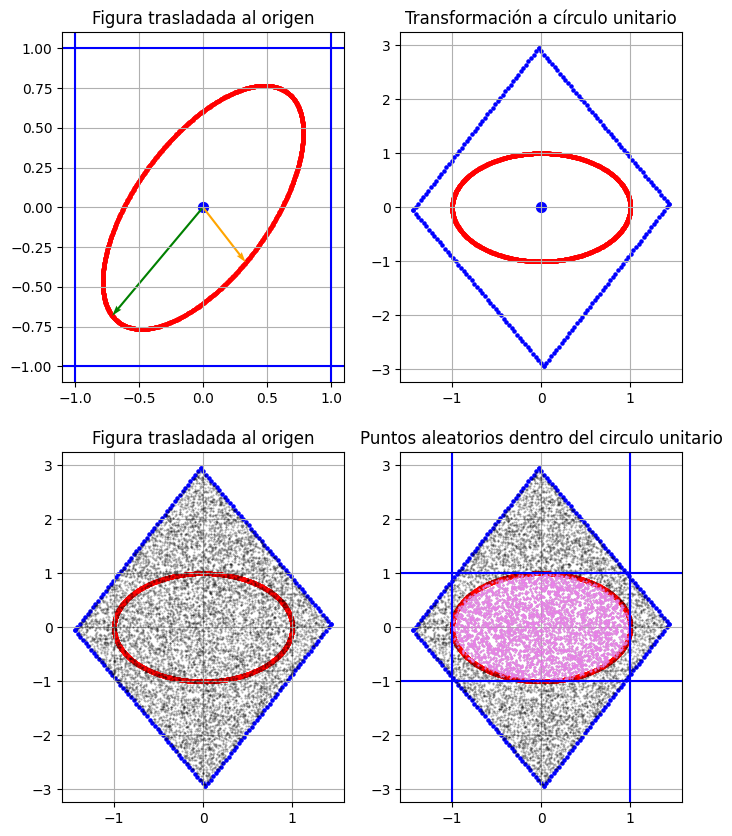

In [97]:


fig, axs = plt.subplots(2, 2, figsize=(8, 10))


axs[0][0].scatter(elipse_en_origen[0, :], elipse_en_origen[1, :], color='red', label='Forma', s=5)
axs[0][0].scatter(nuevo_centro[0], nuevo_centro[1], color='blue', label='Centro', s=50)  # Centro en azul
axs[0][0].quiver(nuevo_centro[0], nuevo_centro[1], nuevo_v1[0], nuevo_v1[1], color='green', angles='xy', scale_units='xy', scale=1, label='Vector Principal 1')
axs[0][0].quiver(nuevo_centro[0], nuevo_centro[1], nuevo_v2[0], nuevo_v2[1], color='orange', angles='xy', scale_units='xy', scale=1, label='Vector Principal 2')
axs[0][0].axhline(-1, color='blue')
axs[0][0].axhline(1, color='blue')
axs[0][0].axvline(-1, color='blue')
axs[0][0].axvline(1, color='blue')
axs[0][0].grid()
axs[0][0].set_title("Figura trasladada al origen")



axs[0][1].scatter(circulo_unitario[0, :], circulo_unitario[1, :], color='red', label='Forma', s=5)
axs[0][1].scatter(nuevo_centro[0], nuevo_centro[1], color='blue', label='Centro', s=50)  # Centro en azul
axs[0][1].scatter(perim_unitario[0, :], perim_unitario[1, :], color='blue', label='Forma', s=5)
axs[0][1].grid()
axs[0][1].set_title("Transformación a círculo unitario")

axs[1][0].plot(samples_unitario[0, :], samples_unitario[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[1][0].scatter(circulo_unitario[0, :], circulo_unitario[1, :], color='red', label='Forma', s=5)
axs[1][0].scatter(perim_unitario[0, :], perim_unitario[1, :], color='blue', label='Forma', s=5)
axs[1][0].set_title("Figura trasladada al origen")
axs[1][0].grid()



axs[1][1].plot(samples_unitario[0, :], samples_unitario[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[1][1].plot(xy_dentro_circulo[0, :], xy_dentro_circulo[1, :], '.', color='violet', markersize=1, label='puntos dentro del círculo')
axs[1][1].scatter(perim_unitario[0, :], perim_unitario[1, :], color='blue', label='Forma', s=5)
axs[1][1].scatter(circulo_unitario[0, :], circulo_unitario[1, :], color='red', label='círculo unitario', s=5)
axs[1][1].axhline(-1, color='blue')
axs[1][1].axhline(1, color='blue')
axs[1][1].axvline(-1, color='blue')
axs[1][1].axvline(1, color='blue')
axs[1][1].set_title("Puntos aleatorios dentro del circulo unitario")
axs[1][1].grid()


plt.show()

In [98]:

a_region = 4
N_samples_circulo= xy_dentro_circulo.shape[1]

area_circulo = a_region* (N_samples_circulo/ N_samples)
print(area_circulo)

1.4764


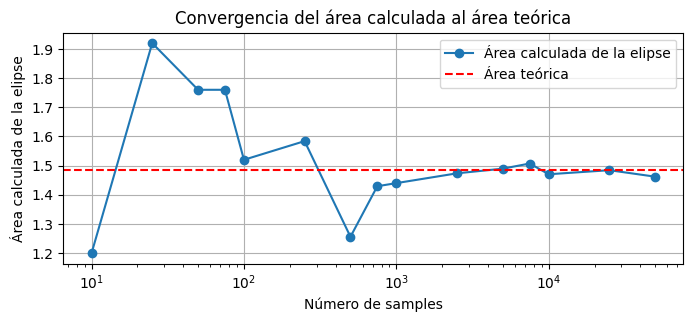

In [99]:
# Rango de números de los samples
N = np.array([10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000])
A_elipse = np.zeros(N.shape[0])  # Array para almacenar las áreas calculadas

# Área del rectángulo
a_region = (3.25 - 1.25) * (4.25 - 2.25)

for i, N_samples in enumerate(N):
    # Generar puntos aleatorios dentro del rectángulo
    xx = np.random.uniform(low=1.25, high=3.25, size=N_samples)
    yy = np.random.uniform(low=2.25, high=4.25, size=N_samples)
    xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios

    # Trasladar y transformar los puntos
    samples_centro = calcular_centro(xy)
    samples_trasladados = traslacion_al_origen_2(xy, samples_centro)
    samples_unitario = transform_circulo_unit(samples_trasladados, nuevo_v1, nuevo_v2)

    # Calcular la distancia al origen en el sistema unitario
    distancia_al_origen = np.linalg.norm(samples_unitario, axis=0)

    # Filtrar puntos dentro del círculo unitario (distancia <= 1)
    puntos_dentro_circulo = distancia_al_origen <= 1
    xy_dentro_circulo = samples_unitario[:, puntos_dentro_circulo]

    N_samples_circulo= xy_dentro_circulo.shape[1]

    # Calcular el área de la elipse aproximada
    A_elipse[i] = a_region * (N_samples_circulo / N_samples)

# Área teórica de la elipse
area_teorica = np.pi * float(np.abs(np.cross(nuevo_v1, nuevo_v2)))


# Graficar
plt.figure(figsize=(8, 3))
plt.plot(N, A_elipse, label='Área calculada de la elipse', marker='o')
plt.axhline(y=area_teorica, color='r', linestyle='--', label='Área teórica')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Área calculada de la elipse')
plt.title('Convergencia del área calculada al área teórica')
plt.legend()
plt.grid()
plt.show()


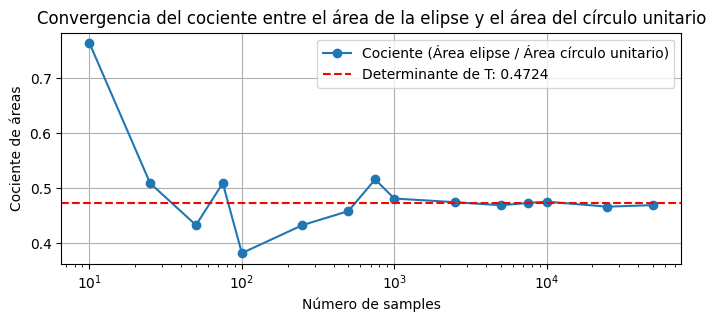

In [100]:

# Rango de números de samples
N = np.array([10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000])
cociente_areas = np.zeros(N.shape[0])  # Array para almacenar los cocientes calculados

# Área del círculo unitario
area_circulo_unitario = np.pi

a_region = (3.25 - 1.25) * (4.25 - 2.25)

for i, N_samples in enumerate(N):
    xx = np.random.uniform(low=1.25, high=3.25, size=N_samples)
    yy = np.random.uniform(low=2.25, high=4.25, size=N_samples)
    xy = np.vstack((xx, yy))

    # Trasladar y transformar los puntos
    samples_centro = calcular_centro(xy)
    samples_trasladados = traslacion_al_origen_2(xy, samples_centro)
    samples_unitario = transform_circulo_unit(samples_trasladados, nuevo_v1, nuevo_v2)

    # Calcular la distancia al origen en el sistema unitario
    distancia_al_origen = np.linalg.norm(samples_unitario, axis=0)

    # Filtrar puntos dentro del círculo unitario (distancia <= 1)
    puntos_dentro_circulo = distancia_al_origen <= 1
    xy_dentro_circulo = samples_unitario[:, puntos_dentro_circulo]

    # Calcular el área aproximada de la elipse
    N_samples_circulo = xy_dentro_circulo.shape[1]
    area_elipse = a_region * (N_samples_circulo / N_samples)

    # Calcular el cociente entre el área de la elipse y el área del círculo unitario
    cociente_areas[i] = area_elipse / area_circulo_unitario

# Determinante de la matriz de transformación
T = np.vstack((nuevo_v1, nuevo_v2)).T
determinante_T = np.abs(np.linalg.det(T))

# Graficar el cociente de áreas y el determinante
plt.figure(figsize=(8, 3))
plt.plot(N, cociente_areas, label='Cociente (Área elipse / Área círculo unitario)', marker='o')
plt.axhline(y=determinante_T, color='r', linestyle='--', label=f'Determinante de T: {determinante_T:.4f}')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Cociente de áreas')
plt.title('Convergencia del cociente entre el área de la elipse y el área del círculo unitario')
plt.legend()
plt.grid()
plt.show()


 Al aumentar el número de samples, el cociente entre el área de la elipse y el área del círculo unitario converge al determinante de la matriz de transformación. Esto se debe a que el determinante refleja el factor de escalamiento aplicado al área en la transformación lineal que lleva el círculo  a una elipse

## Área del triángulo

In [60]:
txt2= '/content/drive/MyDrive/Matematica discreta/f2.txt'
matriz1 = np.loadtxt(txt2)

x = matriz1[0, :]
y = matriz1[1, :]

In [61]:

# Coordenadas del rectángulo
x_min, x_max = 2, 5  # Los límites en el eje X
y_min, y_max = 3.9, 6  # Los límites en el eje Y

# Generar puntos a lo largo del perímetro
# Lado inferior (de x_min a x_max en y_min)
bottom_side_x = np.linspace(x_min, x_max, 50)
bottom_side_y = np.full_like(bottom_side_x, y_min)

# Lado derecho (de y_min a y_max en x_max)
right_side_y = np.linspace(y_min, y_max, 50)
right_side_x = np.full_like(right_side_y, x_max)

# Lado superior (de x_max a x_min en y_max)
top_side_x = np.linspace(x_max, x_min, 50)
top_side_y = np.full_like(top_side_x, y_max)

# Lado izquierdo (de y_max a y_min en x_min)
left_side_y = np.linspace(y_max, y_min, 50)
left_side_x = np.full_like(left_side_y, x_min)

# Combinar todos los lados en una sola matriz
x_perimetro = np.concatenate([bottom_side_x, right_side_x, top_side_x, left_side_x])
y_perimetro = np.concatenate([bottom_side_y, right_side_y, top_side_y, left_side_y])

# Crear la matriz de coordenadas
perimetro_rectangulo = np.vstack([x_perimetro, y_perimetro])



In [62]:
N_samples = 10000
xx = np.random.uniform(low=2, high=5, size=N_samples)
yy = np.random.uniform(low=3.9, high=6, size=N_samples)
xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios


In [63]:

# 1. Traslación para llevar el punto más cercano al origen
distancias = np.linalg.norm(matriz1, axis=0)
indice_punto_cercano = np.argmin(distancias)
punto_cercano = matriz1[:, indice_punto_cercano]
puntos_trasladados = matriz1 - punto_cercano.reshape(2, 1)

perimetro_rectangulo_tras= perimetro_rectangulo - punto_cercano.reshape(2, 1)


x_1 = puntos_trasladados[0, :]
y_1 = puntos_trasladados[1, :]

samples_tras= xy - punto_cercano.reshape(2, 1)

# 2. Encontrar el punto más lejano después de la traslación inicial
distancias_trasladadas = np.linalg.norm(puntos_trasladados, axis=0)
indice_punto_lejano = np.argmax(distancias_trasladadas)
punto_lejano = puntos_trasladados[:, indice_punto_lejano]

# 3. Calcular el ángulo necesario para alinear el punto lejano con el eje Y
angulo = np.arctan2(punto_lejano[0], punto_lejano[1])
matriz_rotacion = np.array([
    [np.cos(angulo), -np.sin(angulo)],
    [np.sin(angulo), np.cos(angulo)]
])

# 4. Aplicar la rotación a todos los puntos para que el punto lejano quede en el eje Y
puntos_final = matriz_rotacion @ puntos_trasladados
perimetro_rectangulo_rot= matriz_rotacion @ perimetro_rectangulo_tras
samples_rot= matriz_rotacion @ samples_tras

x_2 = puntos_final[0, :]
y_2 = puntos_final[1, :]


In [64]:
#transformacion lineal

# 1. Encontrar el punto más alejado del eje X (máxima coordenada Y)
indice_max_y = np.argmax(puntos_final[1, :])  # Indice del punto con mayor Y
punto_max_y = puntos_final[:, indice_max_y]  # Coordenada del punto más alejado del eje Y

# 2. Encontrar el punto más alejado del eje Y (máxima coordenada X)
indice_max_x = np.argmax(puntos_final[0, :])  # Indice del punto con mayor X
punto_max_x = puntos_final[:, indice_max_x]  # Coordenada del punto más alejado del eje X

# 3. Construir los vectores desde el origen (0, 0) hasta los puntos encontrados
# El vector hacia el punto más alejado del eje Y
vector_max_y = punto_max_y  # Esto ya es el vector (0, 0) -> (x_max_y, y_max_y)

# El vector hacia el punto más alejado del eje X
vector_max_x = punto_max_x  # Esto ya es el vector (0, 0) -> (x_max_x, y_max_x)
print(vector_max_x)
print(vector_max_y)

[0.76162101 1.37885691]
[1.64213317e-16 3.13300340e+00]


In [65]:
def transform_circulo_unit(data, v1, v2):
    """
    Transforma los puntos de una elipse en `data` para convertirla en un círculo unitario.
    Usa los vectores principales `v1` y `v2` como la base.
    """
    # Matriz de transformación: base formada por los vectores v1 y v2
    T = np.vstack((v1, v2)).T

    # Aplicar la transformación inversa para escalar la elipse a un círculo unitario
    transformar_data = np.dot(np.linalg.inv(T), data)
    return transformar_data

triangulo_unitario = transform_circulo_unit(puntos_final, vector_max_x, vector_max_y)
perimetro_rectangulo_unit = transform_circulo_unit(perimetro_rectangulo_rot, vector_max_x, vector_max_y)
samples_unit= transform_circulo_unit(samples_rot, vector_max_x, vector_max_y)


In [66]:
# Grafico Samples dentro del triángulo
condicion_y = (samples_unit[1, :] >= 0) & (samples_unit[1, :] <= (1 - samples_unit[0, :]))

condicion_x = (samples_unit[0,:] >= 0) & (samples_unit[0,:] <= 1)

triangulo = condicion_x & condicion_y
# Filtro los puntos que cumplen la condición
xy_triangulo = samples_unit[:, triangulo]

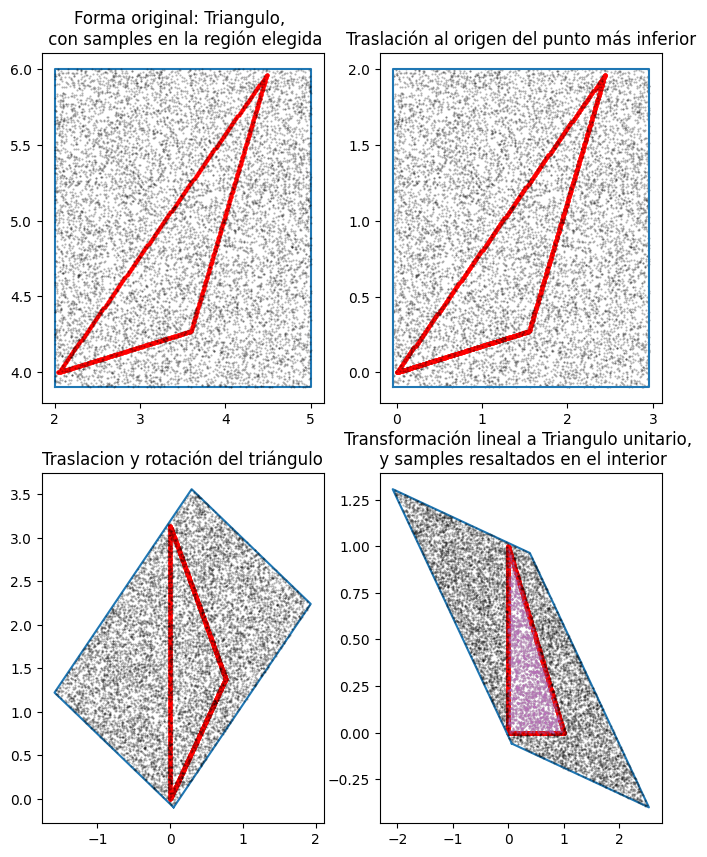

In [67]:

fig, axs = plt.subplots(2,2 , figsize=(8, 10))

axs[0][0].scatter(x, y, color='red', label='Forma', s=4)
axs[0][0].plot(perimetro_rectangulo[0, :], perimetro_rectangulo[1, :])
axs[0][0].plot(xy[0, :], xy[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[0][0].set_title("Forma original: Triangulo, \n con samples en la región elegida")


axs[0][1].scatter(x_1, y_1, color='red', label='Forma', s=5)
axs[0][1].plot(samples_tras[0, :], samples_tras[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[0][1].set_title("Traslación al origen del punto más inferior")
axs[0][1].plot(perimetro_rectangulo_tras[0, :], perimetro_rectangulo_tras[1, :], label="Perímetro del rectángulo")


axs[1][0].scatter(x_2, y_2, color='red', label='Forma', s=5)
axs[1][0].plot(perimetro_rectangulo_rot[0, :], perimetro_rectangulo_rot[1, :], label="Perímetro del rectángulo")
axs[1][0].plot(samples_rot[0, :], samples_rot[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[1][0].set_title("Traslacion y rotación del triángulo")

axs[1][1].scatter(triangulo_unitario[0, :], triangulo_unitario[1, :], color='red', label='Forma', s=5)
axs[1][1].plot(perimetro_rectangulo_unit[0, :], perimetro_rectangulo_unit[1, :], label="Perímetro del rectángulo")
axs[1][1].plot(samples_unit[0, :], samples_unit[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha= 0.3)
axs[1][1].plot(xy_triangulo[0, :], xy_triangulo[1, :], '.', color='violet', markersize=1, label='puntos dentro del círculo', alpha=0.3)
axs[1][1].set_title("Transformación lineal a Triangulo unitario, \n y samples resaltados en el interior")



plt.show()

In [73]:
a_region = 3 * 2.1

N_samples_triangulo= xy_triangulo.shape[1]

area_triangulo = a_region* (N_samples_triangulo/ N_samples)
print(area_triangulo)

1.1773440000000002


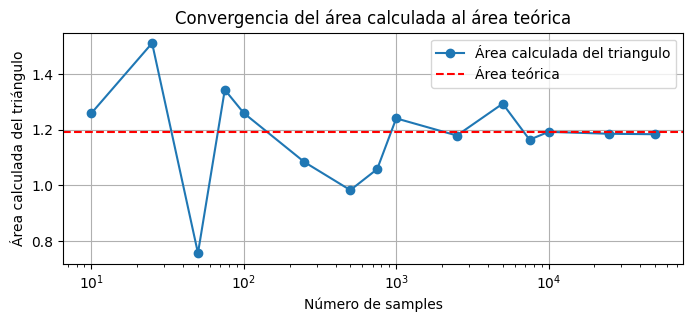

In [74]:
# Rango de números de los samples
N = np.array([10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000])
A_triangulo = np.zeros(N.shape[0])  # Array para almacenar las áreas calculadas



for i, N_samples in enumerate(N):
    # Generar puntos aleatorios dentro del rectángulo
    xx = np.random.uniform(low=2, high=5, size=N_samples)
    yy = np.random.uniform(low=3.9, high=6, size=N_samples)
    xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios

    # Trasladar y transformar los puntos
    samples_tras = xy - punto_cercano.reshape(2, 1)
    samples_rot = matriz_rotacion @ samples_tras
    samples_unit = transform_circulo_unit(samples_rot, vector_max_x, vector_max_y)


    # Grafico Samples dentro del triángulo
    condicion_y = (samples_unit[1, :] >= 0) & (samples_unit[1, :] <= (1 - samples_unit[0, :]))

    condicion_x = (samples_unit[0,:] >= 0) & (samples_unit[0,:] <= 1)

    triangulo = condicion_x & condicion_y

    # Filtro los puntos que cumplen la condición
    xy_triangulo = samples_unit[:, triangulo]

    N_samples_triangulo = xy_triangulo.shape[1]

    # Calcular el área del triángulo aproximada
    A_triangulo[i] = a_region * (N_samples_triangulo / N_samples)

    # Área teórica del triángulo
    area_teorica = 0.5 * float(np.abs(np.linalg.norm(np.cross(vector_max_x, vector_max_y))))




# Graficar
plt.figure(figsize=(8, 3))
plt.plot(N, A_triangulo, label='Área calculada del triangulo', marker='o')
plt.axhline(y= area_teorica, color='r', linestyle='--', label='Área teórica')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Área calculada del triángulo')
plt.title('Convergencia del área calculada al área teórica')
plt.legend()
plt.grid()
plt.show()

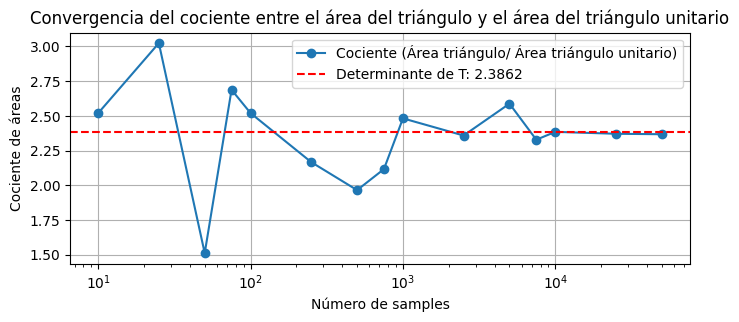

In [75]:
# Array para almacenar los cocientes de área
cociente_areas = np.zeros(N.shape[0])

for i, areas in enumerate(A_triangulo):
    cociente_areas[i] = areas / 0.5  # Dividir cada área por el área del triángulo unitario (0.5)

# Matriz de transformación:
T = np.vstack((vector_max_x, vector_max_y)).T
# Determinante de la matriz de transformación
determinante_T = np.abs(np.linalg.det(T))

# Graficar el cociente de áreas y el determinante
plt.figure(figsize=(8, 3))
plt.plot(N, cociente_areas, label='Cociente (Área triángulo/ Área triángulo unitario)', marker='o')
plt.axhline(y=determinante_T, color='r', linestyle='--', label=f'Determinante de T: {determinante_T:.4f}')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Cociente de áreas')
plt.title('Convergencia del cociente entre el área del triángulo y el área del triángulo unitario')
plt.legend()
plt.grid()
plt.show()

## Área Paralelogramo

In [76]:
txt3= '/content/drive/MyDrive/Matematica discreta/f3.txt'
matriz1 = np.loadtxt(txt3)

x = matriz1[0, :]
y = matriz1[1, :]

In [77]:

# Coordenadas del rectángulo
x_min, x_max = 1.9, 5.5  # Los límites en el eje X
y_min, y_max = 2.9, 5.5  # Los límites en el eje Y

# Generar puntos a lo largo del perímetro
# Lado inferior (de x_min a x_max en y_min)
bottom_side_x = np.linspace(x_min, x_max, 50)
bottom_side_y = np.full_like(bottom_side_x, y_min)

# Lado derecho (de y_min a y_max en x_max)
right_side_y = np.linspace(y_min, y_max, 50)
right_side_x = np.full_like(right_side_y, x_max)

# Lado superior (de x_max a x_min en y_max)
top_side_x = np.linspace(x_max, x_min, 50)
top_side_y = np.full_like(top_side_x, y_max)

# Lado izquierdo (de y_max a y_min en x_min)
left_side_y = np.linspace(y_max, y_min, 50)
left_side_x = np.full_like(left_side_y, x_min)

# Combinar todos los lados en una sola matriz
x_perimetro = np.concatenate([bottom_side_x, right_side_x, top_side_x, left_side_x])
y_perimetro = np.concatenate([bottom_side_y, right_side_y, top_side_y, left_side_y])

# Crear la matriz de coordenadas
perimetro_rectangulo = np.vstack([x_perimetro, y_perimetro])



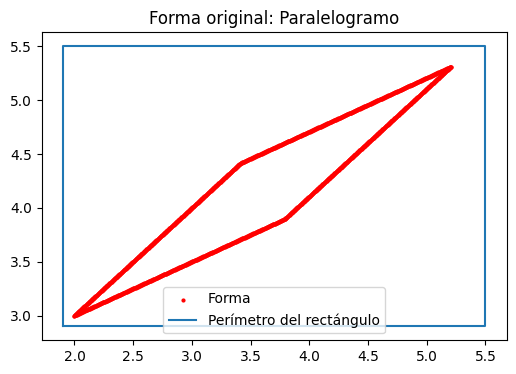

In [78]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='red', label='Forma', s=4)
plt.plot(perimetro_rectangulo[0, :], perimetro_rectangulo[1, :], label="Perímetro del rectángulo")
plt.title("Forma original: Paralelogramo")
plt.legend()
plt.show()

In [79]:

N_samples = 10000
xx = np.random.uniform(low=1.9, high=5.5, size=N_samples)
yy = np.random.uniform(low=2.9, high=5.5, size=N_samples)
xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios

In [80]:
# 1. Traslación para llevar el punto más cercano al origen
distancias = np.linalg.norm(matriz1, axis=0)
indice_punto_cercano = np.argmin(distancias)
punto_cercano = matriz1[:, indice_punto_cercano]
puntos_trasladados = matriz1 - punto_cercano.reshape(2, 1)

perimetro_rectangulo_tras= perimetro_rectangulo - punto_cercano.reshape(2, 1)


x_1 = puntos_trasladados[0, :]
y_1 = puntos_trasladados[1, :]

samples_cuad_tras= xy - punto_cercano.reshape(2, 1)

# 2. Encontrar el punto más lejano después de la traslación inicial
distancias_trasladadas = np.linalg.norm(puntos_trasladados, axis=0)
indice_punto_lejano = np.argmax(distancias_trasladadas)
punto_lejano = puntos_trasladados[:, indice_punto_lejano]

# 3. Calcular el ángulo necesario para alinear el punto lejano con el eje Y
angulo = np.arctan2(punto_lejano[0], punto_lejano[1])
matriz_rotacion = np.array([
    [np.cos(angulo), -np.sin(angulo)],
    [np.sin(angulo), np.cos(angulo)]
])

# 4. Aplicar la rotación a todos los puntos para que el punto lejano quede en el eje Y
puntos_final = matriz_rotacion @ puntos_trasladados
perimetro_rectangulo_rot= matriz_rotacion @ perimetro_rectangulo_tras
samples_cuad_rot= matriz_rotacion @ samples_cuad_tras

x_2 = puntos_final[0, :]
y_2 = puntos_final[1, :]

In [81]:
#  Encontrar el punto más alejado del eje X en la dirección positiva (máxima coordenada X)
indice_max_x_pos = np.argmax(puntos_final[0, :])
punto_max_x_pos = puntos_final[:, indice_max_x_pos]

#  Encontrar el punto más alejado del eje X en la dirección negativa (máxima coordenada X negativa)
indice_max_x_neg = np.argmin(puntos_final[0, :])
punto_max_x_neg = puntos_final[:, indice_max_x_neg]


# 4. Construir los vectores desde el origen (0, 0) hasta los puntos encontrados
vector_max_x_pos = punto_max_x_pos  # Esto es el vector (0, 0) -> (x_max_x_pos, y_max_x_pos)
vector_max_x_neg = punto_max_x_neg  # Esto es el vector (0, 0) -> (x_max_x_neg, y_max_x_neg)

# Mostrar los vectores
print(f"Vector hacia el punto más alejado positivo en el eje X: {vector_max_x_pos}")
print(f"Vector hacia el punto más alejado negativo en el eje X: {vector_max_x_neg}")


Vector hacia el punto más alejado positivo en el eje X: [0.32036449 1.97417492]
Vector hacia el punto más alejado negativo en el eje X: [-0.32036449  1.97417492]


In [82]:
def transform_circulo_unit(data, v1, v2):
    """
    Transforma los puntos de una elipse en `data` para convertirla en un círculo unitario.
    Usa los vectores principales `v1` y `v2` como la base.
    """
    # Matriz de transformación: base formada por los vectores v1 y v2
    T = np.vstack((v1, v2)).T

    # Aplicar la transformación inversa para escalar la elipse a un círculo unitario
    transformar_data = np.dot(np.linalg.inv(T), data)
    return transformar_data

cuadrado_unitario = transform_circulo_unit(puntos_final, vector_max_x_pos, vector_max_x_neg)
perimetro_cuadrado_unit = transform_circulo_unit(perimetro_rectangulo_rot, vector_max_x_pos, vector_max_x_neg)
samples_cuad_unit= transform_circulo_unit(samples_cuad_rot, vector_max_x_pos, vector_max_x_neg)


In [83]:
# Filtrar los puntos para que estén dentro del cuadrado unitario
puntos_dentro_unidad = (samples_cuad_unit[0, :] >= 0) & (samples_cuad_unit[0, :] <= 1) & \
                       (samples_cuad_unit[1, :] >= 0) & (samples_cuad_unit[1, :] <= 1)

# Aplicar el filtro
xy_unitario = samples_cuad_unit[:, puntos_dentro_unidad]


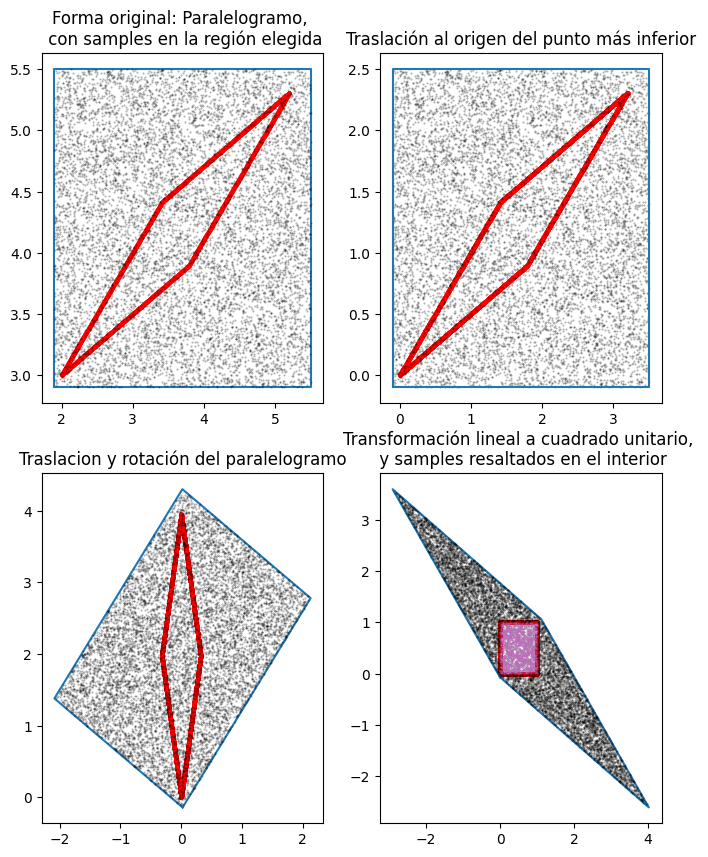

In [84]:
fig, axs = plt.subplots(2,2 , figsize=(8, 10))

axs[0][0].scatter(x, y, color='red', label='Forma', s=4)
axs[0][0].plot(perimetro_rectangulo[0, :], perimetro_rectangulo[1, :])
axs[0][0].plot(xy[0, :], xy[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[0][0].set_title("Forma original: Paralelogramo, \n con samples en la región elegida")


axs[0][1].scatter(x_1, y_1, color='red', label='Forma', s=5)
axs[0][1].plot(samples_cuad_tras[0, :], samples_cuad_tras[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[0][1].set_title("Traslación al origen del punto más inferior")
axs[0][1].plot(perimetro_rectangulo_tras[0, :], perimetro_rectangulo_tras[1, :], label="Perímetro del rectángulo")


axs[1][0].scatter(x_2, y_2, color='red', label='Forma', s=5)
axs[1][0].plot(perimetro_rectangulo_rot[0, :], perimetro_rectangulo_rot[1, :], label="Perímetro del rectángulo")
axs[1][0].plot(samples_cuad_rot[0, :], samples_cuad_rot[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha=0.3)
axs[1][0].set_title("Traslacion y rotación del paralelogramo")

axs[1][1].scatter(cuadrado_unitario[0, :], cuadrado_unitario[1, :], color='red', label='Forma', s=5)
axs[1][1].plot(perimetro_cuadrado_unit[0, :], perimetro_cuadrado_unit[1, :], label="Perímetro del rectángulo")
axs[1][1].plot(samples_cuad_unit[0, :], samples_cuad_unit[1, :], 'k.', markersize=1, label='puntos aleatorios', alpha= 0.3)
axs[1][1].plot(xy_unitario[0, :], xy_unitario[1, :], '.', color='violet', markersize=1, label='puntos dentro del cuadrado', alpha=0.3)
axs[1][1].set_title("Transformación lineal a cuadrado unitario, \n y samples resaltados en el interior")


plt.show()

In [85]:
a_region = (5.5 -1.9) * (5.5 - 2.9)

N_samples_cuadrado= xy_unitario.shape[1]

area_paralelogramo = a_region* (N_samples_cuadrado/ N_samples)
print(area_paralelogramo)

1.2879360000000002


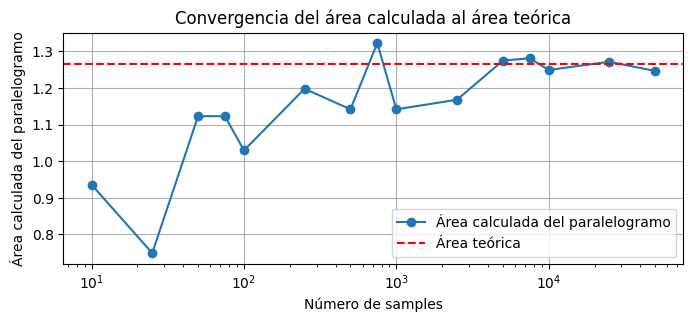

In [86]:
# Rango de números de los samples
N = np.array([10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000])
A_paralelogramo = np.zeros(N.shape[0])  # Array para almacenar las áreas calculadas



for i, N_samples in enumerate(N):
    # Generar puntos aleatorios dentro del rectángulo
    xx = np.random.uniform(low=1.9, high=5.5, size=N_samples)
    yy = np.random.uniform(low=2.9, high=5.5, size=N_samples)
    xy = np.vstack((xx, yy))  # Matriz de puntos aleatorios

    # Trasladar y transformar los puntos
    samples_tras = xy - punto_cercano.reshape(2, 1)
    samples_rot = matriz_rotacion @ samples_tras
    samples_cuad_unit = transform_circulo_unit(samples_rot, vector_max_x_neg, vector_max_x_pos)


  # Filtrar los puntos para que estén dentro del cuadrado unitario
    puntos_dentro_unidad = (samples_cuad_unit[0, :] >= 0) & (samples_cuad_unit[0, :] <= 1) & \
                          (samples_cuad_unit[1, :] >= 0) & (samples_cuad_unit[1, :] <= 1)

    xy_unitario = samples_cuad_unit[:, puntos_dentro_unidad]

    N_samples_cuadrado = xy_unitario.shape[1]


    A_paralelogramo[i] = a_region * (N_samples_cuadrado / N_samples)


    area_teorica = float(np.abs(np.linalg.norm(np.cross(vector_max_x_neg, vector_max_x_pos))))




# Graficar
plt.figure(figsize=(8, 3))
plt.plot(N, A_paralelogramo, label='Área calculada del paralelogramo', marker='o')
plt.axhline(y= area_teorica, color='r', linestyle='--', label='Área teórica')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Área calculada del paralelogramo')
plt.title('Convergencia del área calculada al área teórica')
plt.legend()
plt.grid()
plt.show()

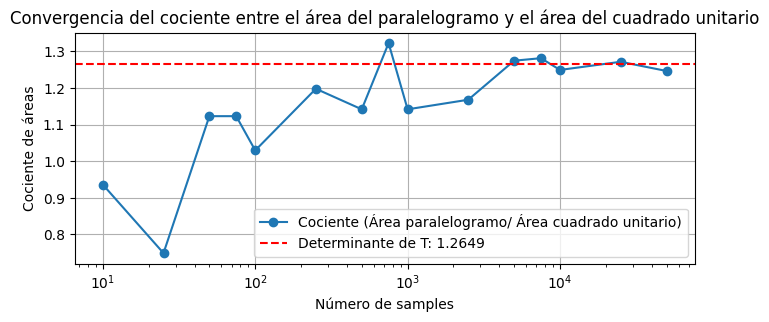

In [87]:
# Array para almacenar los cocientes de área
cociente_areas = np.zeros(N.shape[0])

for i, areas in enumerate(A_paralelogramo):
    cociente_areas[i] = areas / 1

# Matriz de transformación:
T = np.vstack((vector_max_x_pos, vector_max_x_neg)).T
# Determinante de la matriz de transformación
determinante_T = np.abs(np.linalg.det(T))

# Graficar el cociente de áreas y el determinante
plt.figure(figsize=(8, 3))
plt.plot(N, cociente_areas, label='Cociente (Área paralelogramo/ Área cuadrado unitario)', marker='o')
plt.axhline(y=determinante_T, color='r', linestyle='--', label=f'Determinante de T: {determinante_T:.4f}')
plt.xscale('log')  # Usar escala logarítmica para el eje x
plt.xlabel('Número de samples')
plt.ylabel('Cociente de áreas')
plt.title('Convergencia del cociente entre el área del paralelogramo y el área del cuadrado unitario')
plt.legend()
plt.grid()
plt.show()